In [40]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process.kernels import ExpSineSquared, RBF

from darts import TimeSeries
from darts.models import GaussianProcessFilter
from darts.utils import timeseries_generation as tg

In [42]:
import pandas as pd
df  = pd.read_csv("../../../logs/0.03/merged.csv")

In [43]:
series = TimeSeries.from_dataframe(df,time_col="time")

In [46]:
seriesk = series["cpu_rate"]

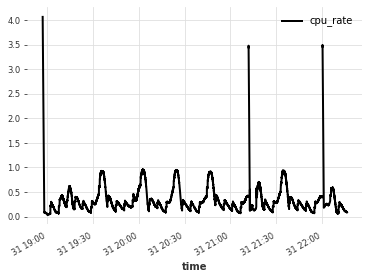

In [47]:
seriesk.plot()

/home/jupyter-babakesistani/.conda/envs/thesis/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


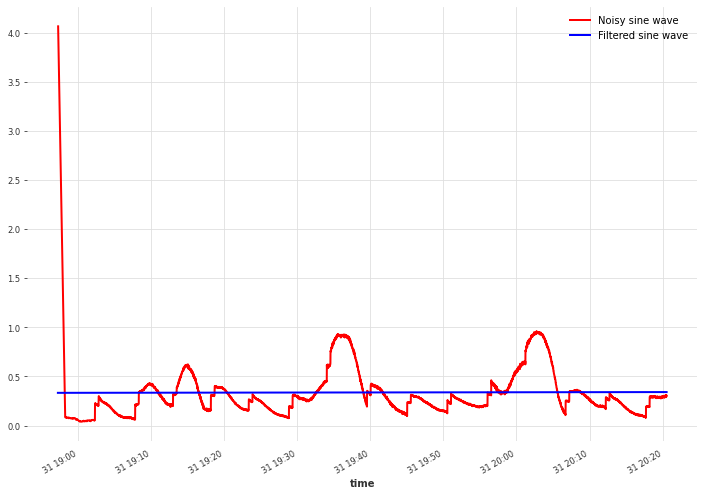

In [21]:
NOISE_DISTANCE = 0.2
SAMPLE_SIZE = 1
np.random.seed(42)

# kernel = ExpSineSquared()
kernel = RBF()

gpf = GaussianProcessFilter(
    kernel=kernel, alpha=NOISE_DISTANCE / 2, n_restarts_optimizer=1
)
filtered_x = gpf.filter(seriesk)

plt.figure(figsize=[12, 8])
# x.plot(color="black", label="Orginal sine wave")
seriesk.plot(color="red", label="Noisy sine wave")
filtered_x.plot(color="blue", label="Filtered sine wave")
plt.legend()

In [18]:
series[:10]

<TimeSeries (DataArray) (time: 10, component: 1, sample: 1)>
array([[[       nan]],

       [[       nan]],

       [[4.06574827]],

       [[3.99890147]],

       [[3.92958413]],

       [[3.86065708]],

       [[3.79162525]],

       [[3.72293792]],

       [[3.65366181]],

       [[3.58568914]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-05-31T18:57:14 ... 2022-05-31T18:57:23
  * component  (component) object 'cpu_rate'
Dimensions without coordinates: sample

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import KalmanFilter
from darts.utils import timeseries_generation as tg

In [5]:
kf = KalmanFilter(dim_x=1)
# kf.fit(y_noise, u)
y_filtered = kf.filter(series)

[2022-06-01 09:37:33,896] ERROR | main_logger | ValueError: The Kalman filter has not been fitted yet. Call `fit()` first or provide Kalman filter in constructor.
[2022-06-01 09:37:33,896] ERROR | main_logger | ValueError: The Kalman filter has not been fitted yet. Call `fit()` first or provide Kalman filter in constructor.
[2022-06-01 09:37:33,896] ERROR | main_logger | ValueError: The Kalman filter has not been fitted yet. Call `fit()` first or provide Kalman filter in constructor.
[2022-06-01 09:37:33,896] ERROR | main_logger | ValueError: The Kalman filter has not been fitted yet. Call `fit()` first or provide Kalman filter in constructor.


ValueError: The Kalman filter has not been fitted yet. Call `fit()` first or provide Kalman filter in constructor.

In [53]:
import pandas as pd
from pykalman import KalmanFilter
import numpy as np

def rolling_window(a, step):
    shape   = a.shape[:-1] + (a.shape[-1] - step + 1, step)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=300)

def get_kf_value(y_values):
    kf = KalmanFilter()
    Kc, Ke = kf.em(y_values, n_iter=1).smooth(0)
    return Kc

# n = 2000
# index = pd.date_range(start='2000-01-01', periods=n)
# data = np.random.randn(n, 4)
# df = pd.DataFrame(data, columns=list('ABCD'), index=index)

df = df.interpolate()
df = df[:100]
wsize = 10
arr = rolling_window(df.cpu_rate.values, wsize)
zero_padding = np.zeros(shape=(wsize-1,wsize))
arrst = np.concatenate((zero_padding, arr))
arrkalman = np.zeros(shape=(len(arrst),1))

for i in range(len(arrst)):
    arrkalman[i] = get_kf_value(arrst[i])

kalmandf = pd.DataFrame(arrkalman, columns=['cpu_rate_kalman'], index=index)
df = pd.concat([df,kalmandf], axis=1)

TypeError: 'int' object is not iterable

In [48]:
 df.fillna(method="ffill",inplace=True)

In [ ]:

df = df.interpolate()
df = df[:100]

In [50]:
df = df[2:]

In [49]:
df.isna()

,time,cpu_rate,memory_rate,read_bytes_rate,write_bytes_rate
0,False,True,False,True,True
1,False,True,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
11933,False,False,False,False,False
11934,False,False,False,False,False
11935,False,False,False,False,False
11936,False,False,False,False,False
